In [35]:
using Plots

In [36]:
include("MultivariateNomal.jl");

PDF at [1.5, 2.5]: 0.15556327812622517


In [37]:
function meshgrid(x, y)
   X = [x for _ in y, x in x]
   Y = [y for y in y, _ in x]
   X, Y
end

meshgrid (generic function with 1 method)

In [47]:
# Define multivariate normal distribution parameters
mₓ  = [0.0, 0.0]  # Mean
Cₓₓ = [1.0 0.0;
       0.0 1.0]  # Covariance

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [48]:
mvn = MvNormal(mₓ, Cₓₓ)

MultivariateNormal([0.0, 0.0], [1.0 0.0; 0.0 1.0])

In [49]:
Nₓ = 100 # grid size
xᵢs = range(-5, stop=5, length=Nₓ)
xⱼs = range(-5, stop=5, length=Nₓ)

-5.0:0.10101010101010101:5.0

In [50]:
xᵢ, xⱼ = meshgrid(xᵢs, xⱼs); @show typeof(meshgrid(xᵢs, xⱼs)); # Generate grid
m = log10(size(xᵢ, 1)); @show m

typeof(meshgrid(xᵢs, xⱼs)) = Tuple{Matrix{Float64}, Matrix{Float64}}
m = 2.0


2.0

In [51]:
𝑓ₓ = [pdfᵦ(mvn, [xᵢ[i, j], xⱼ[i, j]], Int64(m) ) for i in 1:size(xᵢ, 1), j in 1:size(xᵢ, 2)];

In [52]:
 @show size(xᵢ),size(xⱼ), size(𝑓ₓ);

(size(xᵢ), size(xⱼ), size(𝑓ₓ)) = ((100, 100), (100, 100), (100, 100))


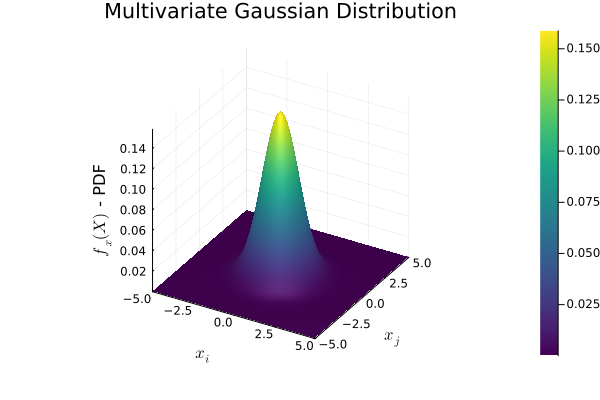

In [53]:
# Plot the surface
surface(xᵢs, xⱼs, 𝑓ₓ
    , xlabel="\$x_i\$", ylabel="\$x_j\$"
    , zlabel="\$f_x(X)\$ - PDF"
    , title="Multivariate Gaussian Distribution"
    , color=:viridis
    # , color=:auto
)

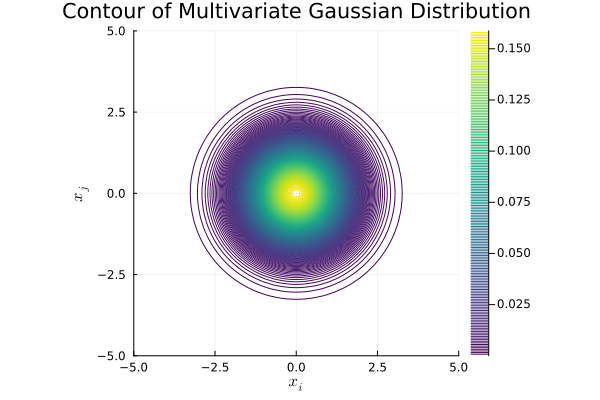

In [54]:
# Plot the contour with a colormap
contour(xᵢs, xⱼs, 𝑓ₓ
    , xlabel="\$x_i\$", ylabel="\$x_j\$"
    , title="Contour of Multivariate Gaussian Distribution"
    , levels=200
    , xlim=(-5, 5), ylim=(-5, 5)
    , aspect_ratio=:equal
    , color=:viridis
    # , color=:rainbow
    # , c=:auto
)